<a href="https://colab.research.google.com/github/shiitake-is-cool/shiitake/blob/main/MLtest4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

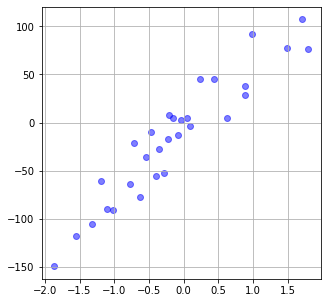

In [1]:
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

X,y = make_regression(
random_state=3,
n_features=1,
noise=20,
n_samples=30)

df = pd.DataFrame(X)
plt.figure(figsize=(5,5))
plt.scatter(df[0],y,color="b",alpha=0.5)
plt.grid()
plt.show()

正解率： 84.98344774428922 %


<function matplotlib.pyplot.show>

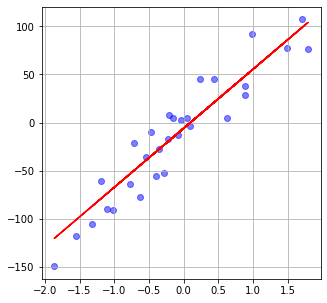

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

model = LinearRegression()
model.fit(X_train,y_train)

pred = model.predict(X_test)
score= r2_score(y_test,pred)
print("正解率：",score*100,"%")

plt.figure(figsize=(5,5))
plt.scatter(X,y,color="b",alpha=0.5)
plt.plot(X,model.predict(X),color="red")
plt.grid()
plt.show



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 散布図に分類の状態を描画する関数
def plot_boundary(model, X, Y, target, xlabel, ylabel):
    # 点と塗りのカラーマップ
    cmap_dots = ListedColormap([ "#1f77b4", "#ff7f0e", "#2ca02c"])
    cmap_fills = ListedColormap([ "#c6dcec", "#ffdec2", "#cae7ca"])

    plt.figure(figsize=(5, 5))
    # モデルがあれば、表示範囲の点をすべて予測して色を塗る
    if model:
        # 表示範囲を少し広げて分割し、調べる点（200x200）を用意する
        XX, YY = np.meshgrid(
            np.linspace(X.min()-1, X.max()+1, 200),
            np.linspace(Y.min()-1, Y.max()+1, 200))
        # 全ての点の値を、モデルで予測する
        pred = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        #　予測結果の値（0〜2）の色（cmap_fills）で塗りつぶす
        plt.pcolormesh(XX, YY, pred, cmap=cmap_fills, shading="auto")
        #　境界を灰色で塗る
        plt.contour(XX, YY, pred, colors="gray") 
    #　targetの値（0〜2）の色（cmap_dots）で点を描画する
    plt.scatter(X, Y, c=target, cmap=cmap_dots)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [6]:
from sklearn.datasets import make_blobs

X,y = make_blobs(
    random_state=0,
    n_features=2,
    centers=2,
    cluster_std=1,
    n_samples=300
)
df = pd.DataFrame(X)
print(df.head())
print(y)

          0         1
0  3.359415  5.248267
1  2.931100  0.782556
2  1.120314  5.758061
3  2.876853  0.902956
4  1.666088  5.605634
[0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1
 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0
 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1
 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1
 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1
 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1
 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1
 0 1 1 0]


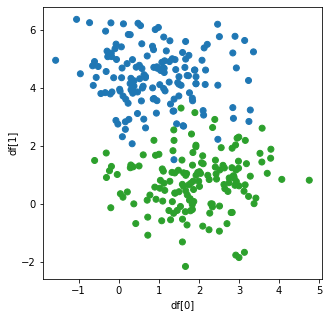

In [9]:
plot_boundary(None,df[0],df[1],y,"df[0]","df[1]")